In [1]:
import navis

navis.set_pbars(hide=True, jupyter=False)

from navis.interfaces import r

import matplotlib.pyplot as plt

from rpy2.robjects.packages import importr
import rpy2.robjects as robjects

In [2]:
nat = importr('nat')

In [3]:
# Get neurons (Drosophila Kenyon cells) shipped with nat
kcs20 = robjects.r('kcs20')

head = robjects.r('head')

head(kcs20)

gene_name,Name,idid,...,cluster,idx,type
'FruM...,'fru-...,1024.000000,...,9,156,gamma
'GadM...,'Gad1...,10616.000000,...,70,"1,519",gamma
'GadM...,'Gad1...,8399.000000,...,57,"1,132",ab
'GadM...,'Gad1...,10647.000000,...,71,"1,535",apbp
'FruM...,'fru-...,9758.000000,...,64,"1,331",ab
'FruM...,'fru-...,6182.000000,...,44,795,ab


In [6]:
kcs20_py = r.dotprops2py(kcs20)
kcs20_py.head()

,gene_name,Name,idid,soma_side,flipped,Driver,Gender,X,Y,Z,exemplar,cluster,idx,type,points
0,FruMARCM-M001205_seg002,fru-M-500112,1024.0,L,0,fru-Gal4,M,361.484872,95.044800,84.102594,FruMARCM-M001205_seg002,9,156,gamma,x y z x_v...
1,GadMARCM-F000122_seg001,Gad1-F-900005,10616.0,L,0,Gad1-Gal4,F,367.833167,105.867548,94.734459,GadMARCM-F000122_seg001,70,1519,gamma,x y z x_v...
2,GadMARCM-F000050_seg001,Gad1-F-100010,8399.0,R,1,Gad1-Gal4,F,382.827911,61.732132,97.280571,GadMARCM-F000050_seg001,57,1132,ab,x y z x_ve...
3,GadMARCM-F000142_seg002,Gad1-F-300043,10647.0,L,0,Gad1-Gal4,F,349.591724,78.189859,96.692797,GadMARCM-F000142_seg002,71,1535,apbp,x y z x_ve...
4,FruMARCM-F000270_seg001,fru-F-400045,9758.0,L,0,fru-Gal4,F,387.523611,114.803444,87.841563,FruMARCM-F000270_seg001,64,1331,ab,x y z x_v...


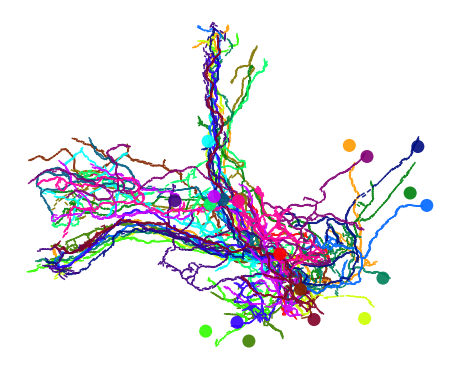

In [8]:
fig, ax = navis.plot2d(kcs20_py, linewidth=1.5)

In [ ]:
nl = navis.example_neurons()

# Note that we are converting to microns as NBLAST is optimized for that resolution
nbl = r.nblast_allbyall(nl, micron_conversion=1/1000, resample=1)

INFO  : Use matplotlib.pyplot.show() to render figure. (navis)


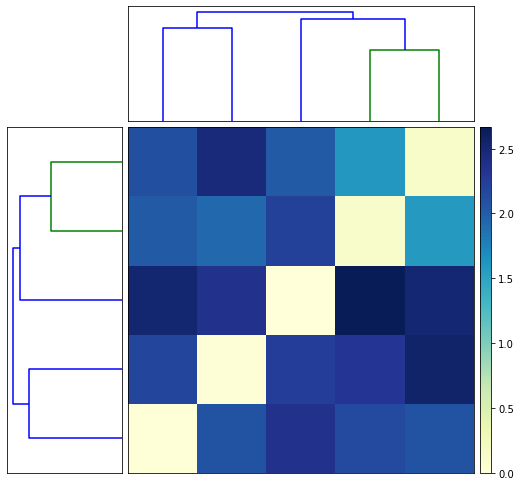

In [14]:
fig = nbl.plot_matrix()

In [3]:
n = navis.example_neurons(1)

# Get the flycircuit database
datadir = robjects.r('getOption("flycircuit.datadir")')[0]
fc = robjects.r(f'read.neuronlistfh("{datadir}/dpscanon.rds")')

nbl = r.nblast(n, db=fc, xform='FAFB14->FCWB', resample=1, mirror=True)

INFO  : Blasting neuron... (navis)
INFO  : Blasting done in 67.3 seconds (navis)


In [51]:
nbl.results.head()

,gene_name,forward_score,reverse_score,mu_score
0,DvGlutMARCM-F002430_seg001,0.614162,0.632155,0.623158
1,FruMARCM-M002373_seg002,0.603885,0.681603,0.642744
2,dTdc2MARCM-F000115_seg001,0.588686,-0.498178,0.045254
3,ChaMARCM-F000725_seg001,0.566431,0.676217,0.621324
4,GadMARCM-F000709_seg001,0.565479,0.566549,0.566014


In [ ]:
fig = nbl.plot3d(hits=2, width=1000)